In [3]:
## Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset

df = pd.read_csv('../Datos/usuarios_win_mac_lin.csv')



In [4]:
X=df[['duracion','paginas','acciones','valor']]
y=df['clase']

In [5]:
### PASO 2 train-test-split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
### PASO 3 Definir dos modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

model_log=LogisticRegression(max_iter=1000)
model_NB=GaussianNB()

In [10]:
## PASO 4 Ajustar

model_log.fit(X_train,y_train)
model_NB.fit(X_train,y_train)

GaussianNB()

In [12]:
y_test

139    0
30     1
119    2
29     1
144    0
163    0
166    0
51     0
105    1
60     0
15     2
158    0
135    0
45     1
68     0
85     0
24     1
109    1
75     0
108    1
19     1
16     2
31     1
18     1
12     2
9      2
82     0
98     1
76     0
55     0
42     1
56     0
150    0
111    2
69     0
138    0
2      2
93     0
136    0
156    0
90     0
114    2
26     1
146    0
137    0
97     2
65     0
36     2
126    2
22     1
101    1
Name: clase, dtype: int64

In [13]:
## PASO 5 predecir

y_pred_log=model_log.predict(X_test)
y_pred_NB=model_NB.predict(X_test)

y_pred_proba_log=model_log.predict_proba(X_test)
y_pred_proba_NB=model_NB.predict_proba(X_test)

In [15]:
### PASO 6 EVALUAR

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [17]:
#### Revisión de la logistica

print(confusion_matrix(y_test,y_pred_log))

[[21  3  1]
 [10  5  0]
 [ 0  0 11]]


In [18]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        25
           1       0.62      0.33      0.43        15
           2       0.92      1.00      0.96        11

    accuracy                           0.73        51
   macro avg       0.74      0.72      0.71        51
weighted avg       0.71      0.73      0.70        51



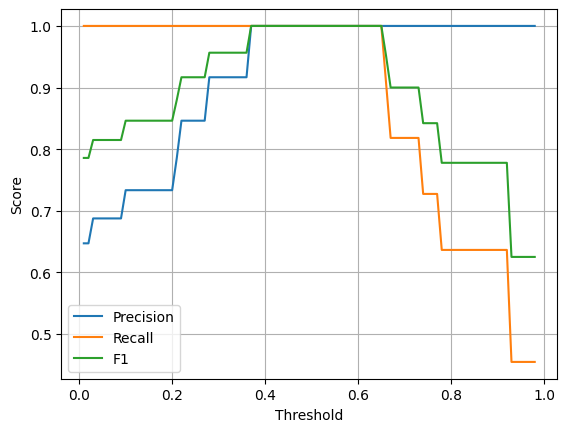

In [45]:
threshold= np.arange(0.01,0.99,0.01)
precision=[]
recall=[]
f1=[]
tpr=[]
fpr=[]

for t in threshold:
    y_pred_temp_log=np.where(y_pred_proba_log[:,2]>t,True,False)
    y_test_temp=y_test==2
    TP=(y_test_temp & y_pred_temp_log).sum()
    TPFP=y_pred_temp_log.sum()
    TPFN=y_test_temp.sum()

    prec=TP/TPFP
    reca=TP/TPFN

    F1 =2*(prec*reca)/(prec+reca)

    precision.append(TP/TPFP)
    recall.append(TP/TPFN)
    f1.append(F1)

fig,ax=plt.subplots()
ax.plot(threshold,precision,label='Precision')
ax.plot(threshold,recall,label='Recall')
ax.plot(threshold,f1,label='F1')
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.grid(True)
ax.legend()
plt.show()

In [44]:
threshold[np.argmax(f1)]

0.93